#                                     Credit Card Fraud Detection 

Dataset contains the transaction from Europe card owners during September 2013. In this dataset 492 are fraud transactions out of 2,84,807 transactions. Data is not balanced because less amount of fraud cases as compared to huge transaction data. Dataset is converted PCA transformation and contains only numeric values. Only time and amount are not transformed to PCA all other given values v1, v2, v3 . . . .. v28 are PCA transformed numeric values. A dataset contains 31 columns and 284807 rows and dataset is highly imbalance. Imbalanced data distribution is overcome using sampling methods.


#### PROBLEM STATEMENT :-

Credit card frauds are happening in large amount and also some banking companies and the companies giving service to banks are facing problem. Every year due to fraud Billions of amounts lost. To analyze the fraud there is lack of research.
So many machine learning algorithms are implemented to detect real world credit card fraud. 


#### OBJECTIVES :-

The Objective of the project is to predict the fraud and fraud less transaction with respect to the time and amount of the transaction using classication machine learning algorithms. Feature class contains 1 for fraud and 0 for normal transaction.


## Import libraries and read the creditcard csv file and set it to a DataFrame called df.

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Use the .info() method to find out how many entries are there

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

A dataset contain 31 columns and 284807 rows and it contains two types of dtype i.e float and int

## Use the .describe() method to find out descriptive statistics.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


mean is equal to median then normal distribution curve is symmetrical and bell shaped.

mean is greater than median the distribution is positively skewed and distribution occur more on right side.

mean is less than median the distribution is negatively skewed and distribution occur more on left side.

std shows the how much variation(dispersion) from the mean.

## Use the .isna() method to find out the missing values

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

It shows dataset contains 0 missing values.

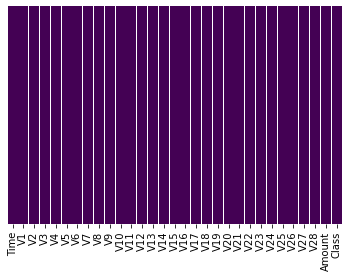

In [6]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
plt.show()

## Use the .unique() method to find out the unique values

In [7]:
df.Class.unique()

array([0, 1], dtype=int64)

## Use .value_counts() returns object containing counts of unique values

In [8]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class contains 1 for fraud and 0 for normal transaction.

## Numerical Univarient Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

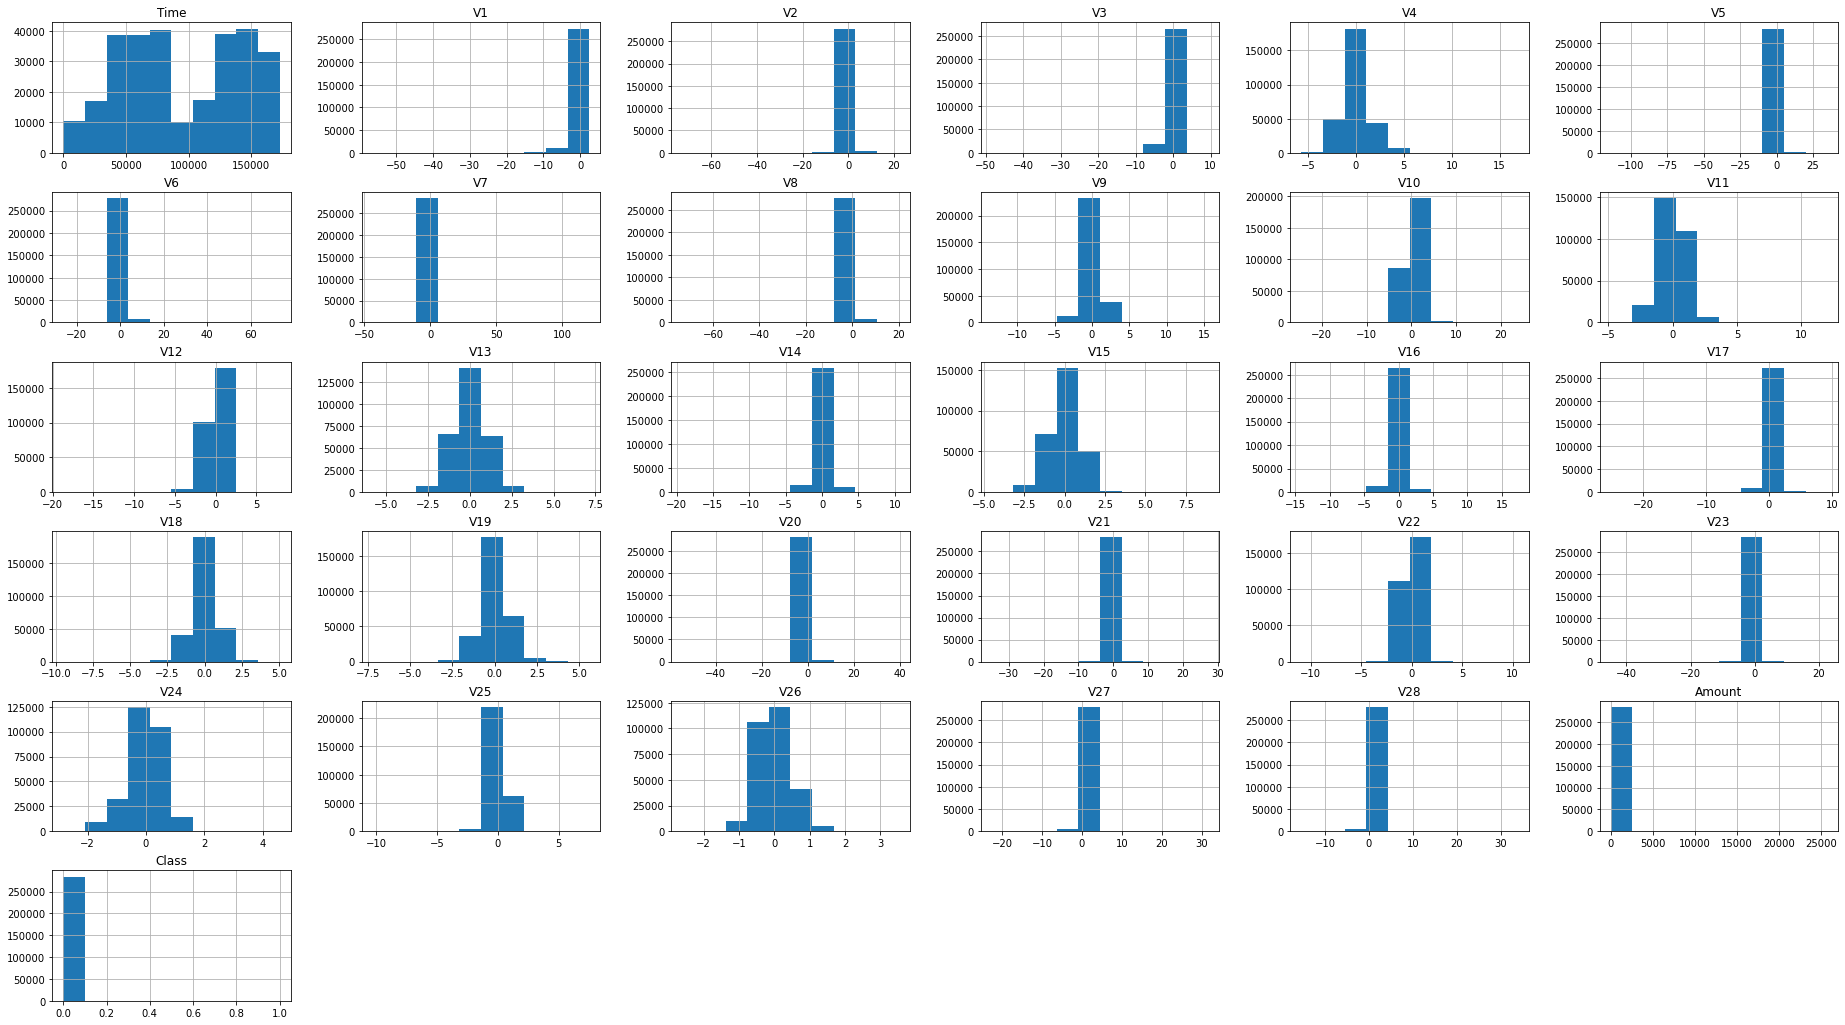

In [9]:
df.hist(bins=10,figsize=(32,18))
plt.show

Shows the data is highly skewed

##  Showing the observational count in category 

<AxesSubplot:xlabel='Class', ylabel='count'>

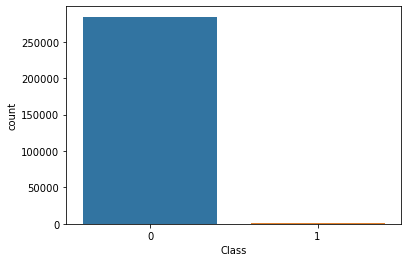

In [10]:
sns.countplot(df["Class"])

It is an Imbalanced dataset so there is very large diffrence between the class 0 and 1. 

## Boxplot Analysis

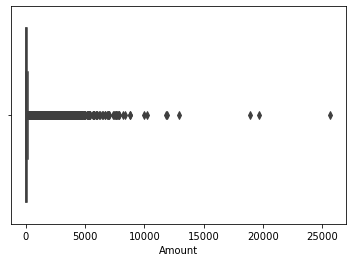

In [43]:
sns.boxplot(df["Amount"])
plt.show()

Shows the data contains high amount of outliers

## Shows the Skewness

In [11]:
from scipy.stats import skew

Time
-0.03556743068120296


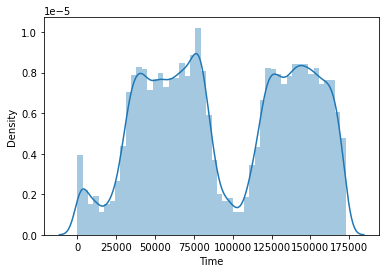

V1
-3.280650024359956


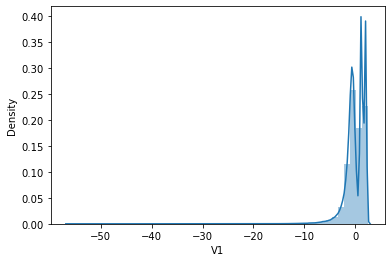

V2
-4.624841215356954


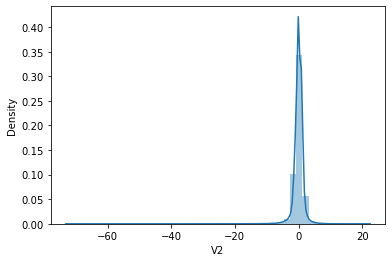

V3
-2.2401436419416543


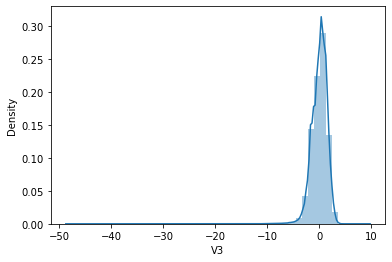

V4
0.6762885361363855


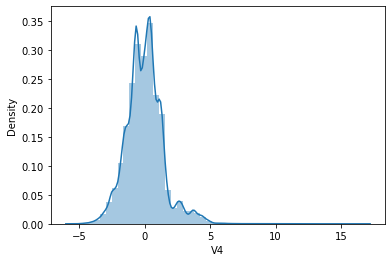

V5
-2.425888719378559


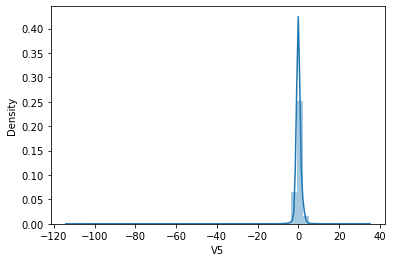

V6
1.8265710448869008


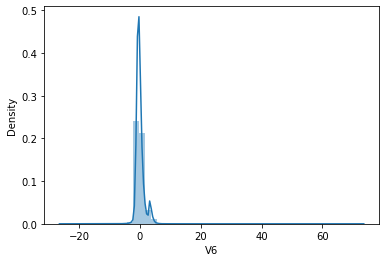

V7
2.5538939666831117


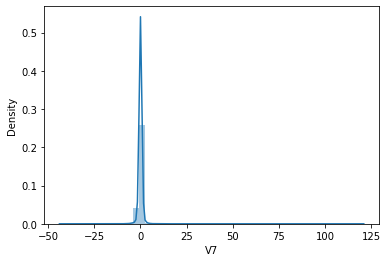

V8
-8.521899311980174


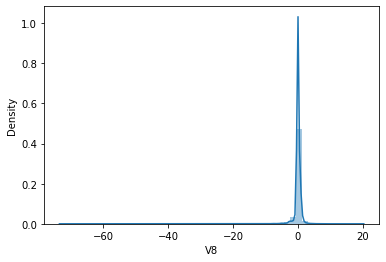

V9
0.5546768505565418


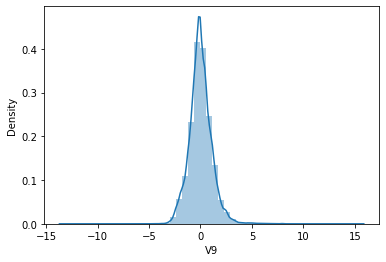

V10
1.1871343376109695


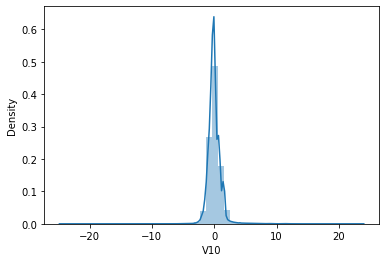

V11
0.35650397786795557


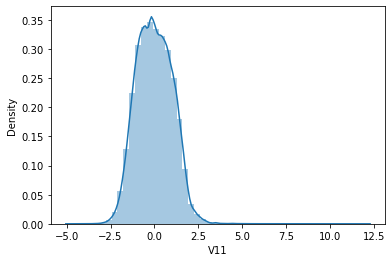

V12
-2.278388935683072


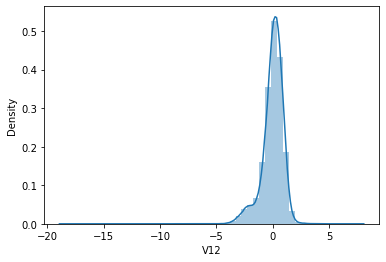

V13
0.0652331143394307


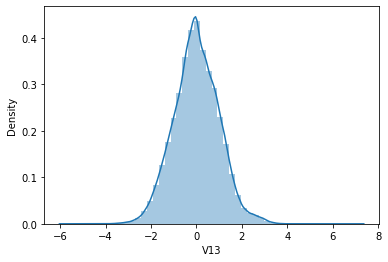

V14
-1.9951653322115102


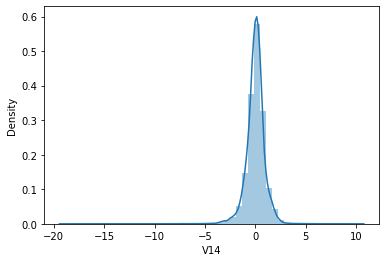

V15
-0.3084213577546761


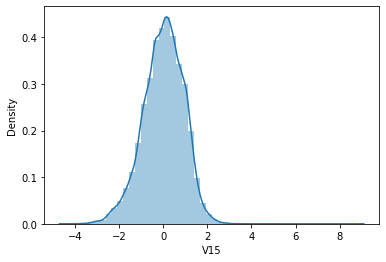

V16
-1.1009604775565411


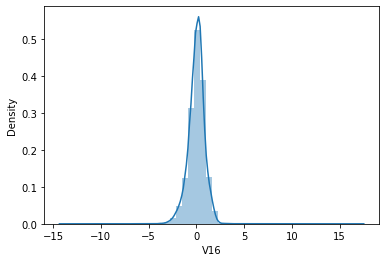

V17
-3.844894223735797


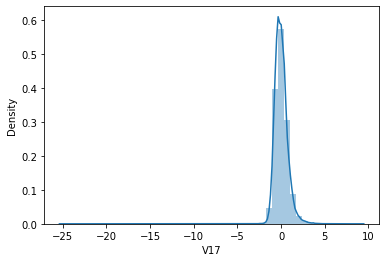

V18
-0.2598788993745328


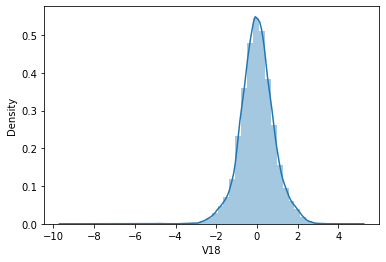

V19
0.109191184897714


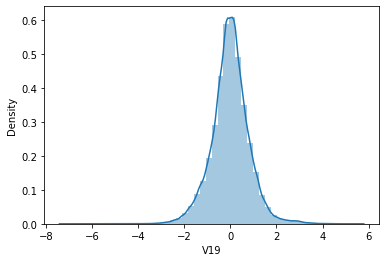

V20
-2.0371445699300117


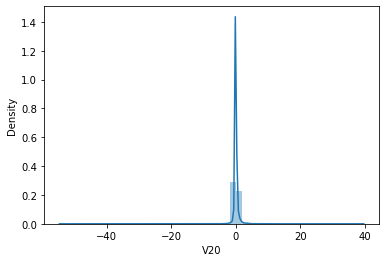

V21
3.5929722697554753


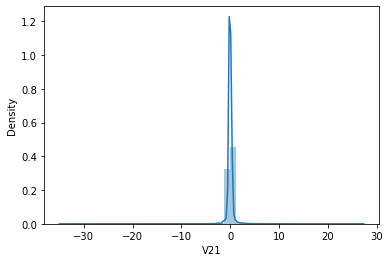

V22
-0.21325649967250146


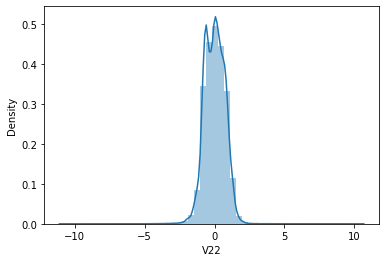

V23
-5.875109397316075


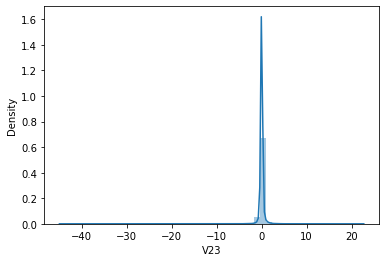

V24
-0.5524963913014509


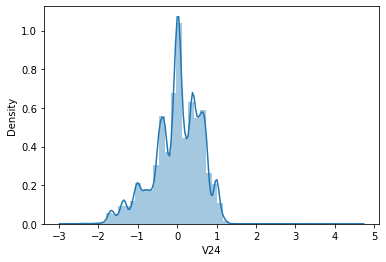

V25
-0.41579040044741566


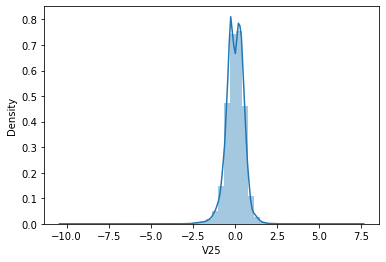

V26
0.5766895799228516


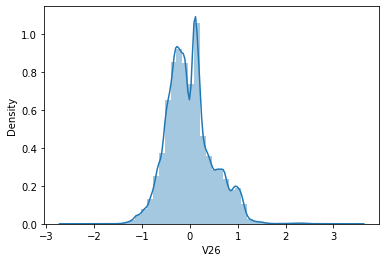

V27
-1.170202779255609


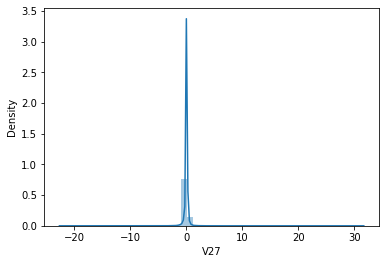

V28
11.19203224646587


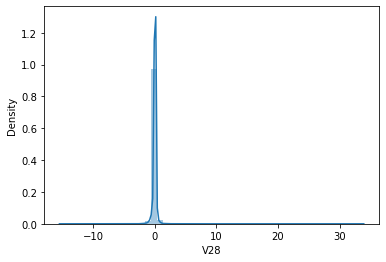

Amount
16.97763503663315


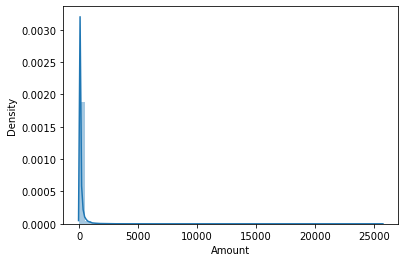

Class
23.99745292182408


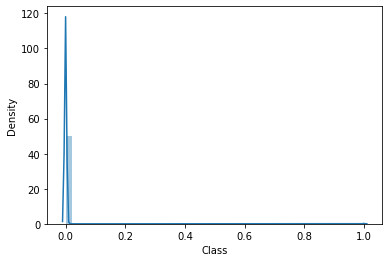

In [12]:
for col in df:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [13]:
df.corr()["Class"].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

Shows most of the transactions are negatively correlated.

## Shows the relationship between variables

<AxesSubplot:>

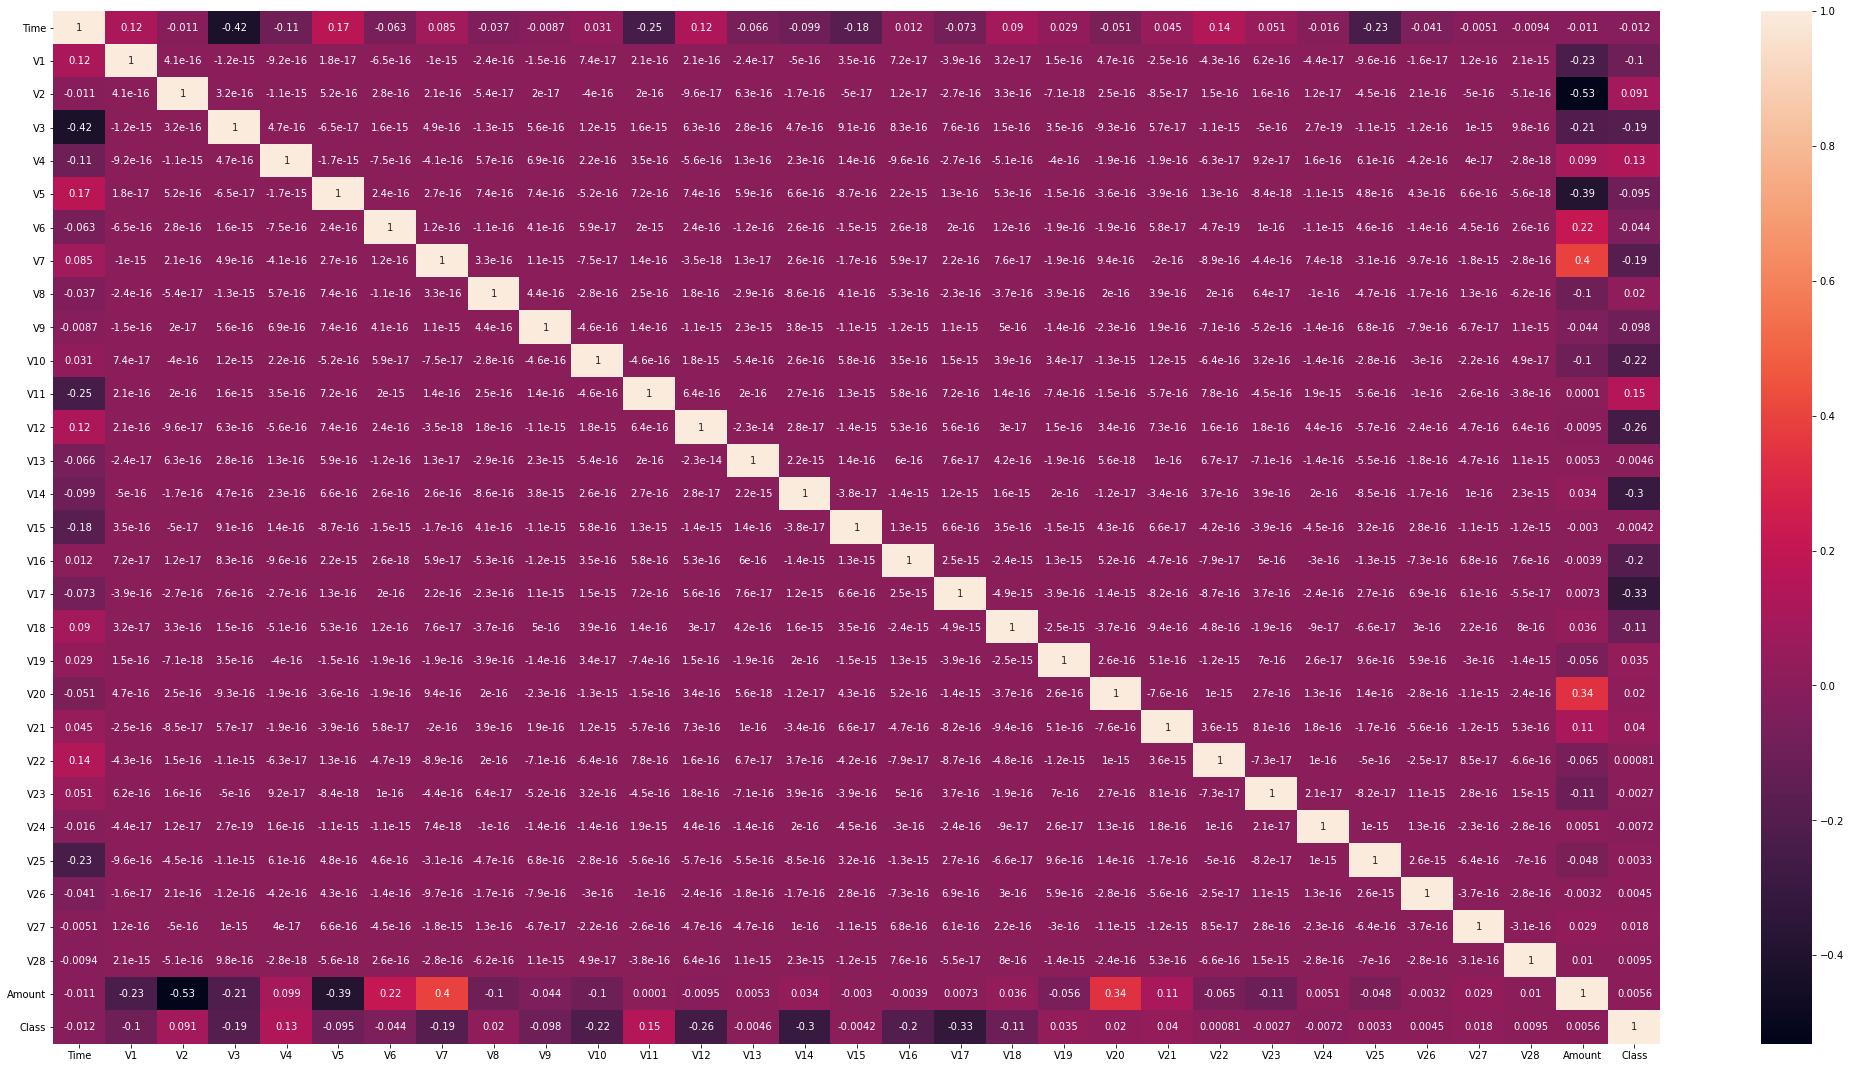

In [14]:
plt.figure(figsize=(36,19))
sns.heatmap(df.corr(),annot=True)

If both variables tend to increase then it is Positive Correlation.

One variable is increasing while the other variable decreasing then it is Negative Correlation.

If both variables become zero then there is No Correlation.

## Shows the correlation between Time and Amount

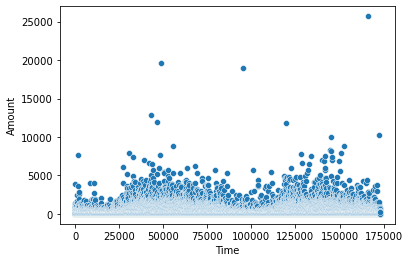

In [15]:
sns.scatterplot(data=df, x='Time', y='Amount')
plt.show()


From the graph above, it does not appear that there is a clustering pattern on a time interval. 

So, we would assume that fraud occured across time quite randomly.

## Separate the data 

In [16]:
x=df.iloc[: ,:-1]
y=df.iloc[: , -1]

## Oversampling by importing SMOTE

In [17]:
!pip install imblearn

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE()
xnew, ynew = smote.fit_resample(x, y)

In [20]:
ynew.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## Train the model by using train_test_split

In [21]:
from sklearn.model_selection import train_test_split

In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(xnew, ynew, test_size=0.3, random_state=1)

## Importing Model

In [61]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [62]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [63]:
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.9580043261875033
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     85428
           1       0.97      0.95      0.96     85161

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589

[[82704  2724]
 [ 4440 80721]]


## Checking Overffiting

In [64]:
train = logreg.score(xtrain, ytrain)
train

0.9578485633389525

In [65]:
test = logreg.score(xtest,ytest)
test

0.9580043261875033

Here Training Accuracy is similar to testing Accuracy so model is perform good.

## Checking Predictions

In [66]:
x=[[0.0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,0.090794172,-0.551599533,-0.617800856,-0.991389847,-0.311169354,1.468176972,-0.470400525,0.207971242,0.02579058,0.40399296,0.251412098,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62]]
logreg.predict(x)

array([0], dtype=int64)

In [67]:
y=[[0,1,72781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,0.090794172,-0.551599533,-0.617800856,-0.991389847,-0.311169354,1.468176972,-0.470400525,0.207971242,0.02579058,0.40399296,0.251412098,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62]]
logreg.predict(y)

array([1], dtype=int64)

## Reducing type 2 Error by importing binarize

In [68]:
print(f"Actual values :- {ytest[:25].values}")
print(f"Predicted values :- {ypred[:25]}")

Actual values :- [0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1]
Predicted values :- [0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1]


In [69]:
print(f"Actual values :- {ytest[25:50].values}")
print(f"Predicted values :- {ypred[25:50]}")

Actual values :- [1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0]
Predicted values :- [1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0]


In [70]:
logreg.predict_proba(xtest)

array([[8.89980925e-01, 1.10019075e-01],
       [9.87282249e-01, 1.27177508e-02],
       [1.83247147e-01, 8.16752853e-01],
       ...,
       [2.22044605e-15, 1.00000000e+00],
       [9.92686704e-01, 7.31329642e-03],
       [4.06626539e-07, 9.99999593e-01]])

In [71]:
ypredprob=logreg.predict_proba(xtest)[: ,1]
ypredprob

array([0.11001908, 0.01271775, 0.81675285, ..., 1.        , 0.0073133 ,
       0.99999959])

In [72]:
from sklearn.preprocessing import binarize

In [73]:
ypred=binarize([ypredprob], threshold=0.30)[0]

In [74]:
ypred

array([0., 0., 1., ..., 1., 0., 1.])

In [75]:
print(f"Actual values :- {ytest[:25].values}")
print(f"Predicted values :- {ypred[:25].astype(int)}")

Actual values :- [0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1]
Predicted values :- [0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1]


In [76]:
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.9414616417236751
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     85428
           1       0.92      0.96      0.94     85161

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589

[[78537  6891]
 [ 3095 82066]]


## ROC Curve

In [77]:
from sklearn.metrics import roc_curve

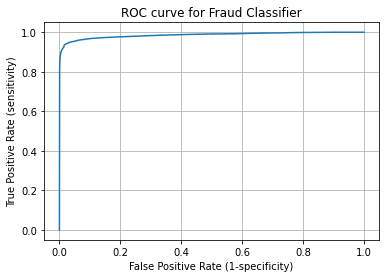

In [78]:
fpr, tpr, thres =roc_curve(ytest, ypredprob)
plt.plot(fpr, tpr)
plt.title("ROC curve for Fraud Classifier")
plt.xlabel("False Positive Rate (1-specificity)")
plt.ylabel("True Positive Rate (sensitivity)")
plt.grid(True)
plt.show()

Here ROC curve is closer to the top-left corner indicate a better performance.

## Conclusion :

Credit card fraud is most common problem resulting in loss of lot money for people and loss for some banks and credit card company. 
This project want to help the peoples from their wealth loss and also for the banked company and trying to develop the model which more efficiently separate the fraud and fraud less transaction by using the time and amount feature in dataset by using some machine learning algorithms such as logistic regression.

## Result :

By using dimensions of credit card fraud now anyone can easily predict the fraud transaction for class contains 1 and normal transaction for class contains 0. 